In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",999) # display all columns
pd.set_option("display.max_rows", 999)

from pymatgen.analysis.local_env import BrunnerNN_reciprocal, EconNN, JmolNN, \
                                        MinimumDistanceNN, MinimumOKeeffeNN, MinimumVIRENN, \
                                        VoronoiNN, VoronoiNN_modified, CrystalNN
from materialscoord.core import Benchmark, HumanInterpreter

methods = [BrunnerNN_reciprocal(), EconNN(), JmolNN(), CrystalNN(), VoronoiNN(tol=0.5),
           MinimumDistanceNN(), MinimumOKeeffeNN(), MinimumVIRENN(),
           HumanInterpreter()]
structure_groups = ["elemental"]

/Users/hillarypan/AJResearch/cn_routines/codes/pymatgen/pymatgen/__init__.py:89: UserWarning: 
Pymatgen will drop Py2k support from v2019.1.1. Pls consult the documentation
at https://www.pymatgen.org for more details.
  at https://www.pymatgen.org for more details.""")


In [2]:
algos = ["BrunnerNN_reciprocal", "EconNN", "JmolNN", "CrystalNN", "VoronoiNN",
         "MinimumDistanceNN", "MinimumOKeeffeNN", "MinimumVIRENN"]

d = {}
for sigma in np.arange(0, 0.06, 0.01):
    preset = Benchmark.from_preset(preset_name=structure_groups, perturb=True, perturb_sigma=sigma)
    preset.benchmark(methods=methods)
    df = preset.score(methods)
    
    for a in algos:
        total = df.iloc[-1][a]
        if a not in d:
            d[a] = [(sigma, total)]
        else:
            d[a].append((sigma, total))

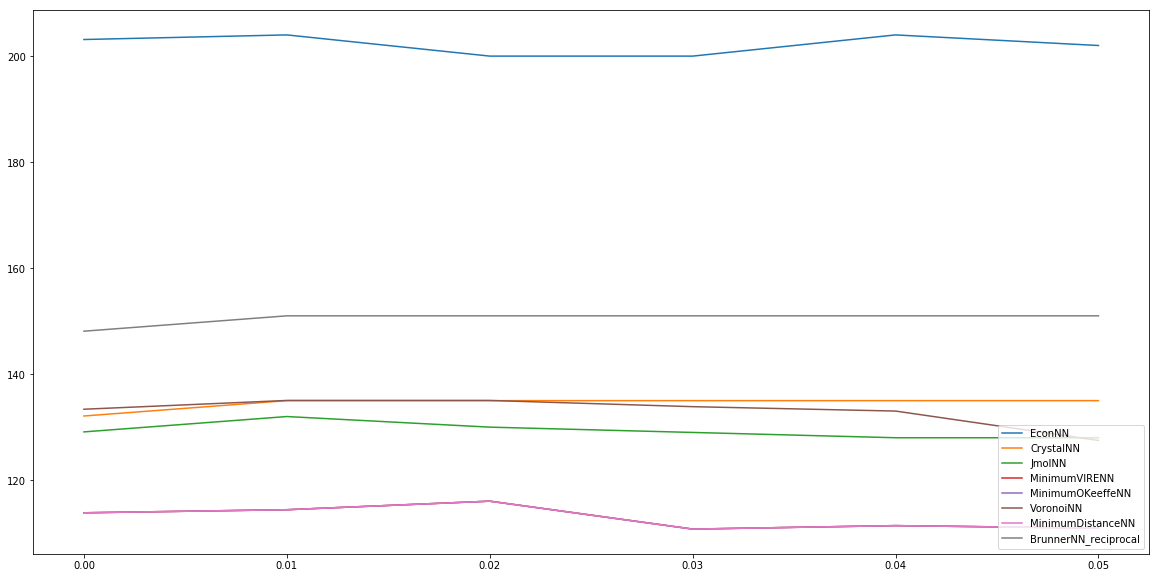

In [4]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(20, 10))

for data_list in d.values():
    zip(*data_list)
    plt.plot(*zip(*data_list))
plt.legend(d.keys(), loc='lower right')
plt.show()